In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import yaml

import MopsAnalysis
import MopsReader
import MopsPlotter
from MopsTracker import MopsTracker
from MopsParameters import MopsParameters


% matplotlib inline

In [2]:
dbname = 'fullsky5year.db'

In [3]:
con = sql.connect(dbname)

In [4]:
full = pd.read_sql_query("""
SELECT * FROM withAstromErr
ORDER BY RANDOM()
LIMIT 10000
""", con)

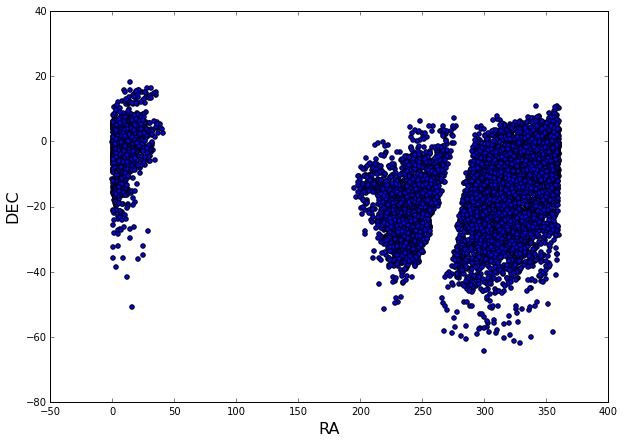

In [5]:
MopsPlotter.plotDataframe(full)

In [6]:
mjd = [51029,51065]
ra = [300,302]
dec = [-20,-18]
nights = mjd[1]-mjd[0]

In [7]:
ssmids = pd.read_sql_query("""
SELECT DISTINCT ssmid FROM noAstromErr
WHERE (mjd BETWEEN %f AND %f) AND (dec BETWEEN %f and %f) AND (ra BETWEEN %f AND %f)
""" % (mjd[0], mjd[1], dec[0], dec[1], ra[0], ra[1]), con)

In [8]:
len(ssmids['ssmid'])

6017

In [9]:
obj_num = 1000

In [10]:
num_ssm = random.sample(ssmids['ssmid'], obj_num)
sample = ""
for i in num_ssm:
    sample += str(i) + ', '
    
sample = '(' + sample[0:-2] + ')'

In [11]:
objs = pd.read_sql_query("""
SELECT * FROM noAstromErr
WHERE ssmid IN %s
""" % (sample), con, index_col='diaid')

In [12]:
objs

,obshistid,ssmid,ra,dec,mjd,mag,snr
diaid,,,,,,,
139030,88649592,4050589,303.128855,-15.784703,51029.253088,20.790819,7.978521
139676,88649594,9411254,303.834516,-15.947712,51029.253535,19.854415,19.375101
139760,88649597,315274,303.466818,-18.209655,51029.253985,20.519381,10.523924
139765,88649597,390503,302.459830,-18.332581,51029.253985,20.981312,6.877100
139769,88649597,420124,301.443099,-17.905091,51029.253985,21.270750,5.267810
139779,88649597,624676,304.050839,-17.750090,51029.253985,21.239773,5.420267
139781,88649597,571943,304.083747,-18.648316,51029.253985,21.322066,5.024623
139819,88649597,1084519,304.203143,-18.792706,51029.253985,20.703827,8.879719
139822,88649597,1177685,305.026244,-17.862421,51029.253985,20.024649,16.598558


In [13]:
objs.to_csv("moresampledata.txt", sep=" ", header=False, index='diaid')

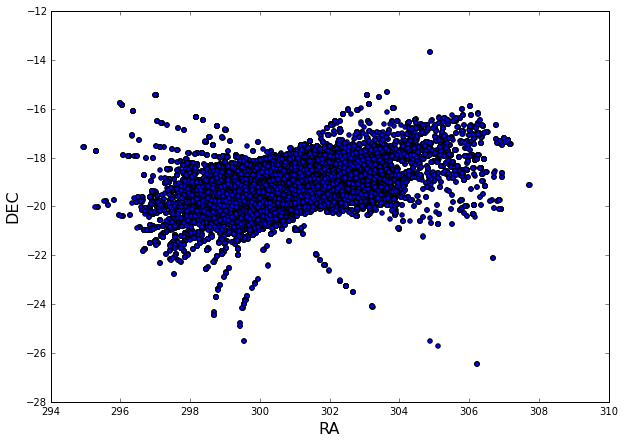

In [14]:
MopsPlotter.plotDataframe(objs)

In [15]:
! rm -rf nightly_testing/
! rm -rf obshist_testing/
! mkdir nightly_testing
! mkdir obshist_testing

In [16]:
! python $MOPS_DIR/bin/splitByNight.py moresampledata.txt nightly_testing obshist_testing

In [17]:
! rm -rf script_testing_run/

In [18]:
! python runMops.py nightly_testing script_testing_run

------- Run MOPS -------
Running LSST's Moving Object Pipeline

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         0.5
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.001
---- purifyTracklets ----
	Maximum RMS:                              0.001
---- removeSubsets ----
	Remove subsets:                           False
	Keep only longest:                        False
---- makeLinkTrackletsInput_byNight.py ----
	Window size:                              15
---- linkTracklets ----
	 Detection error threshold:               0.0004
	 Maximum right ascension accel

In [19]:
parameters = yaml.load(file('/Users/joachim/repos/neosim/script_testing_run/parameters.yaml','r'))
tracker = yaml.load(file('/Users/joachim/repos/neosim/script_testing_run/tracker.yaml','r'))

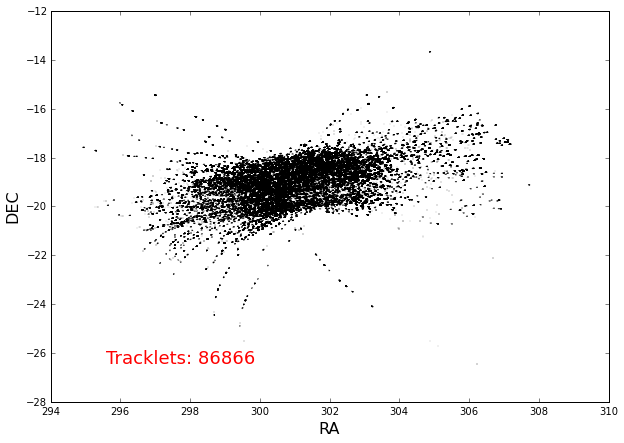

In [20]:
MopsPlotter.plotTracklets(tracker.diaSources, tracker.tracklets)

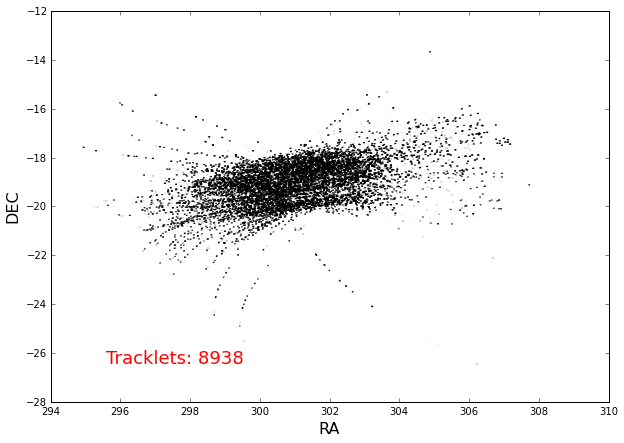

In [21]:
MopsPlotter.plotTracklets(tracker.diaSources, tracker.collapsedTrackletsById)

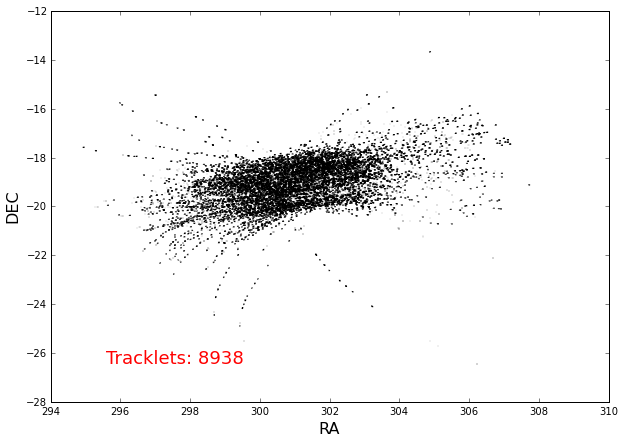

In [22]:
MopsPlotter.plotTracklets(tracker.diaSources, tracker.purifiedTrackletsById)

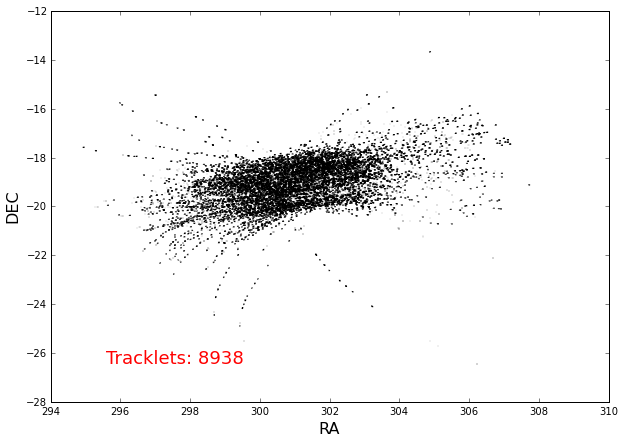

In [23]:
MopsPlotter.plotTracklets(tracker.diaSources, tracker.finalTrackletsById)

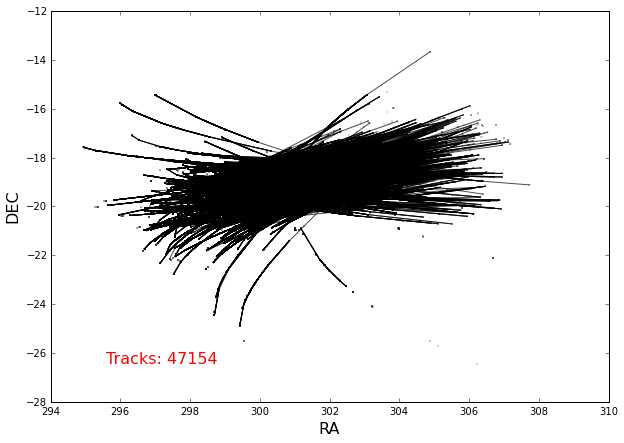

In [24]:
MopsPlotter.plotTracks(tracker.dets, tracker.tracks)

In [25]:
import MopsAnalysis

In [26]:
analysis = MopsAnalysis.runAnalysis(parameters, tracker)

Starting analysis for 51029.tracklets at Wed Jan 20 16:31:41 2016
Writing results to /Users/joachim/repos/neosim/script_testing_run/tracklets/51029.tracklets.results
Finished analysis for 51029.tracklets at Wed Jan 20 16:31:41 2016

Starting analysis for 51030.tracklets at Wed Jan 20 16:31:41 2016
Writing results to /Users/joachim/repos/neosim/script_testing_run/tracklets/51030.tracklets.results
Finished analysis for 51030.tracklets at Wed Jan 20 16:31:41 2016

Starting analysis for 51033.tracklets at Wed Jan 20 16:31:41 2016
Writing results to /Users/joachim/repos/neosim/script_testing_run/tracklets/51033.tracklets.results
Finished analysis for 51033.tracklets at Wed Jan 20 16:31:41 2016

Starting analysis for 51034.tracklets at Wed Jan 20 16:31:41 2016
Writing results to /Users/joachim/repos/neosim/script_testing_run/tracklets/51034.tracklets.results
Finished analysis for 51034.tracklets at Wed Jan 20 16:31:41 2016

Starting analysis for 51036.tracklets at Wed Jan 20 16:31:41 2016
Wr

In [27]:
analysis.startTime

'Wed Jan 20 16:31:41 2016'

In [28]:
analysis.endTime

'Wed Jan 20 16:33:13 2016'

In [29]:
analysis.totalTracks

47154

In [30]:
analysis.trueTracks

43086

In [31]:
analysis.falseTracks

4068

In [32]:
float(analysis.trueTracks)/analysis.totalTracks

0.9137294821224075

In [33]:
print analysis.totalTracklets
print analysis.trueTracklets
print analysis.falseTracklets
print float(analysis.trueTracklets)/analysis.totalTracklets

86866
81319
5547
0.936143024889


In [34]:
print analysis.totalCollapsedTracklets
print analysis.trueCollapsedTracklets
print analysis.falseCollapsedTracklets
print float(analysis.trueCollapsedTracklets)/analysis.totalCollapsedTracklets

8938
6453
2485
0.721973595883


In [35]:
# The few cells above will be cleaned up and implemented as part of the analysis run. 